# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:18px 80px;">Capstone Project | Fraud Detection</p>

<img src= "https://itchronicles.com/wp-content/uploads/2023/02/Fraud-Detection-1536x768.jpg" width = 1800>

<div style="border-radius:9px; padding: 15px; background-color: #2A1F80; font-size:120%; text-align:left">

<h3 align="left"><font color=white>Problem:</font></h3>

This project analyzes a dataset containing information about various financial transactions. The objective is to develop a predictive model capable of distinguishing between legitimate and fraudulent transactions. Since false negatives (missed frauds) can lead to significant financial loss, the model will prioritize achieving high recall for the positive class (fraud cases).

<div style="border-radius:10px; padding: 15px; background-color: #2A1F80; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Objectives:</font></h3>

1. **Explore the Dataset:** Identify trends, distributions, and relationships between transaction attributes.
2. **Conduct Extensive EDA:** Analyze univariate and bivariate relationships between features and the target variable.
3. **Preprocessing Steps:**
   - Remove irrelevant or redundant features.
   - Handle missing or inconsistent data.
   - Detect and treat outliers.
   - Encode categorical variables appropriately.
   - Transform skewed features to achieve a normal-like distribution.
4. **Model Building:**
   - Create pipelines for models that require feature scaling.
   - Implement and tune classification models such as Logistic Regression, SVM, Decision Trees, Random Forest, and XGBoost.
   - Emphasize high recall to capture fraudulent transactions effectively.
5. **Evaluate and Compare Model Performance:**
   - Use metrics such as precision, recall, F1-score, and ROC-AUC to assess model performance.
    


<a id="contents_tabel"></a>    
<div style="border-radius:9px; padding: 15px; background-color: #2A1F80; font-size:115%; text-align:left">

<h3 align="left"><font color=white>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
* [Step 4 | Feature Encoding](#fe)
* [Step 5 | Defining Fetures and Targets](#dft)
* [Step 6 | Feture Standardaizing](#sf)
* [Step 7 | Model Building and Fine Tuning](#mb)
* [Step 8 | Model Evaluation ](#me)
* [Step 9 | Model  Comparison](#mc)
* [Step 10| ROC and AUC Curve](#rocauc)

<a id="import"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

#For Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


<a id="read"></a>
# <p style="background-color:#2A1F80 ; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

In [2]:
# Load the Data
df = pd.read_csv(r"C:\Users\karan\Desktop\Them\Fraud_Analysis_Dataset.csv")

<a id="overview"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)

In [3]:
# Data Overview
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None
   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER    181.0  C1305486145          181.0             0.0   
1     1  CASH_OUT    181.0   C840083671          181.0             0.0   
2     1  TRANSFER   2806.0  C1420196421         2806.0      

In [4]:
print(df.describe().T)

                  count          mean           std   min        25%  \
step            11142.0  8.717645e+00  1.606748e+01  1.00     2.0000   
amount          11142.0  2.131915e+05  7.600650e+05  2.39  4946.6175   
oldbalanceOrg   11142.0  9.241173e+05  2.143004e+06  0.00   427.0000   
newbalanceOrig  11142.0  8.249576e+05  2.089894e+06  0.00     0.0000   
oldbalanceDest  11142.0  8.883541e+05  2.601376e+06  0.00     0.0000   
newbalanceDest  11142.0  1.103211e+06  2.982447e+06  0.00     0.0000   
isFraud         11142.0  1.024951e-01  3.033119e-01  0.00     0.0000   

                      50%          75%         max  
step                6.000       7.0000        95.0  
amount          16761.260  154336.5750  10000000.0  
oldbalanceOrg   28169.500  304085.4800  19900000.0  
newbalanceOrig   4420.605  111412.6350  13000000.0  
oldbalanceDest      0.000  271155.4725  33000000.0  
newbalanceDest      0.000  318637.3600  34600000.0  
isFraud             0.000       0.0000         1.0  

<a id="fe"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 4 | Encoding Features</p>

⬆️ [Table of Contents](#contents_tabel)

In [5]:
# Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [6]:
# Encode categorical features
df['type'] = df['type'].astype('category').cat.codes

<a id="dft"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 5 | Defining Features and Targets</p>

⬆️ [Table of Contents](#contents_tabel)

In [7]:
# Define features and target
x = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud'].astype(int)  # Convert target to integer

In [8]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,4,181.00,181.00,0.00,0.00,0.00
1,1,1,181.00,181.00,0.00,21182.00,0.00
2,1,4,2806.00,2806.00,0.00,0.00,0.00
3,1,1,2806.00,2806.00,0.00,26202.00,0.00
4,1,4,20128.00,20128.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
11137,7,2,6393.71,433084.38,426690.68,478421.00,210535.25
11138,7,1,298799.54,426690.68,127891.14,704355.36,5270364.19
11139,7,1,423159.63,127891.14,0.00,610479.00,749621.53
11140,7,3,1094.03,13918.00,12823.97,0.00,0.00


In [9]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11137    0
11138    0
11139    0
11140    0
11141    0
Name: isFraud, Length: 11142, dtype: int64

In [10]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<a id="sf"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 6 | Standardizing Features</p>

⬆️ [Table of Contents](#contents_tabel)

In [11]:
# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<a id="mb"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 7 | Model Building and Fine Tuning</p>

⬆️ [Table of Contents](#contents_tabel)

In [12]:
# Define models with parameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 20, None]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    }
}


In [13]:
# Fine-tune models and evaluate
best_models = {}
results = {}
for name, model in zip(param_grids.keys(), [LogisticRegression(), DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), XGBClassifier(tree_method='hist', eval_metric='logloss', device='cpu'), SVC(), KNeighborsClassifier()]):
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, error_score='raise')
    grid_search.fit(x_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Predict using the best model
    y_pred = best_model.predict(x_test_scaled)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }


In [15]:
# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\karan\Desktop\Them\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the Neural Network model
history = model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8043 - loss: 0.4444 - val_accuracy: 0.9843 - val_loss: 0.0705
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0781 - val_accuracy: 0.9877 - val_loss: 0.0597
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0600 - val_accuracy: 0.9877 - val_loss: 0.0572
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9894 - loss: 0.0546 - val_accuracy: 0.9888 - val_loss: 0.0540
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0530 - val_accuracy: 0.9899 - val_loss: 0.0490
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0456 - val_accuracy: 0.9905 - val_loss: 0.0459
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - loss: 0.0378 - val_accuracy: 0.9916 - val_loss: 0.0449
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0419 - val_accuracy: 0.

<a id="me"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 8 | Model Evaluation</p>

⬆️ [Table of Contents](#contents_tabel)

In [ ]:

# Display Machine learning results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Confusion Matrix:\n", result['Confusion Matrix'])
    print("Classification Report:\n", result['Classification Report'])



Logistic Regression Results:
Accuracy: 0.9897
Confusion Matrix:
 [[1999    0]
 [  23  207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1999
           1       1.00      0.90      0.95       230

    accuracy                           0.99      2229
   macro avg       0.99      0.95      0.97      2229
weighted avg       0.99      0.99      0.99      2229


Decision Tree Results:
Accuracy: 0.9955
Confusion Matrix:
 [[1998    1]
 [   9  221]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       1.00      0.96      0.98       230

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229


Random Forest Results:
Accuracy: 0.9955
Confusion Matrix:
 [[1999    0]
 [  10  220]]
Classification Report:
        

In [17]:

# Evaluate the Neural network model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict and evaluate Neural Network
y_pred_nn = (model.predict(x_test_scaled) > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("Classification Report:")
print(classification_report(y_test, y_pred_nn))


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9921 - loss: 0.0381
Test Accuracy: 0.9910
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[1999    0]
 [  20  210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1999
           1       1.00      0.91      0.95       230

    accuracy                           0.99      2229
   macro avg       1.00      0.96      0.97      2229
weighted avg       0.99      0.99      0.99      2229



<Figure size 1200x600 with 0 Axes>

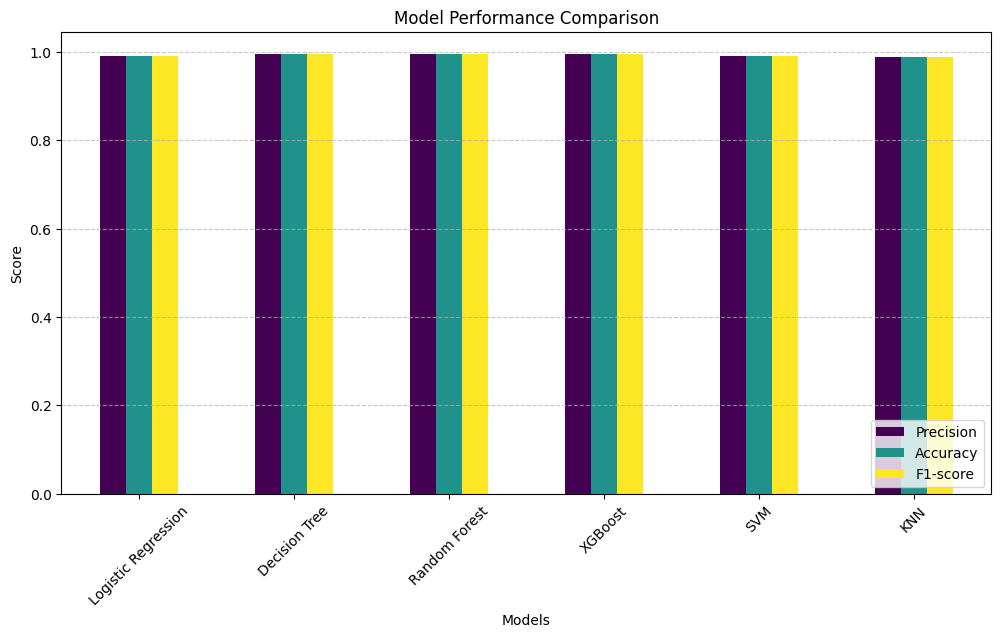

: 

In [ ]:
# Extracting metrics from results dictionary
evaluation_data = []

for name, result in results.items():
    # Convert classification report (string) to dictionary format
    report_dict = classification_report(y_test, best_models[name].predict(x_test_scaled), output_dict=True)

    # Extract weighted average precision and F1-score
    precision = report_dict["weighted avg"]["precision"]
    f1_score = report_dict["weighted avg"]["f1-score"]
    accuracy = result["Accuracy"]

    evaluation_data.append([name, precision, accuracy, f1_score])

# Convert to DataFrame
results_df = pd.DataFrame(evaluation_data, columns=["Model", "Precision", "Accuracy", "F1-score"])
results_df.set_index("Model", inplace=True)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
results_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")

# Customize chart
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

<a id="mc"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 9 | Model Comparision</p>

⬆️ [Table of Contents](#contents_tabel)

C:\Users\karan\AppData\Local\Temp\ipykernel_12028\198282679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


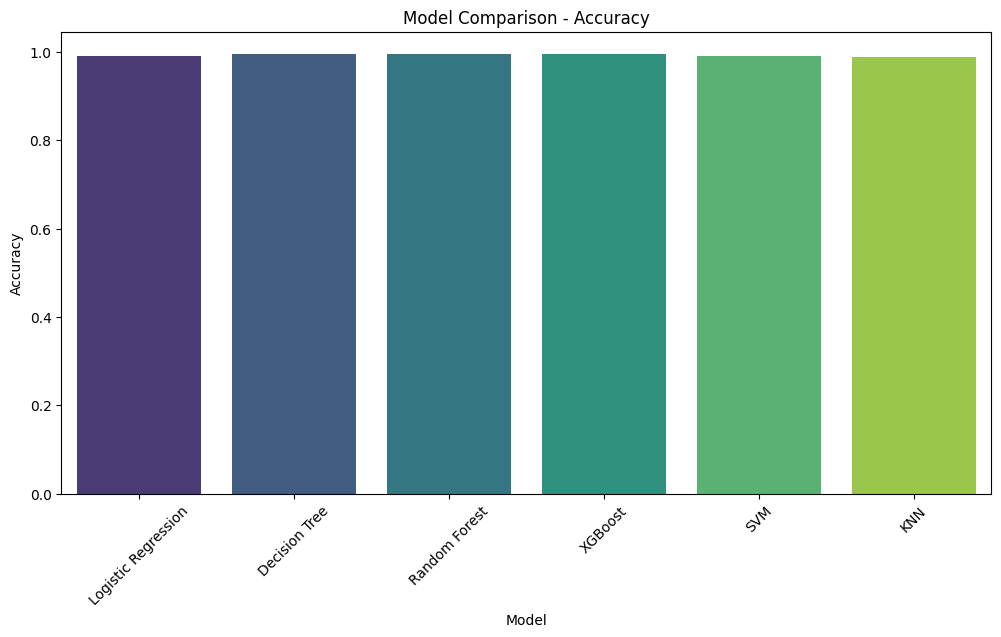

In [20]:
# Plot model comparison
model_names = list(results.keys())
accuracies = [results[name]['Accuracy'] for name in model_names]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


<a id="rocauc"></a>
# <p style="background-color:#2A1F80; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 10 | ROC and AUC Curve</p>

⬆️ [Table of Contents](#contents_tabel)

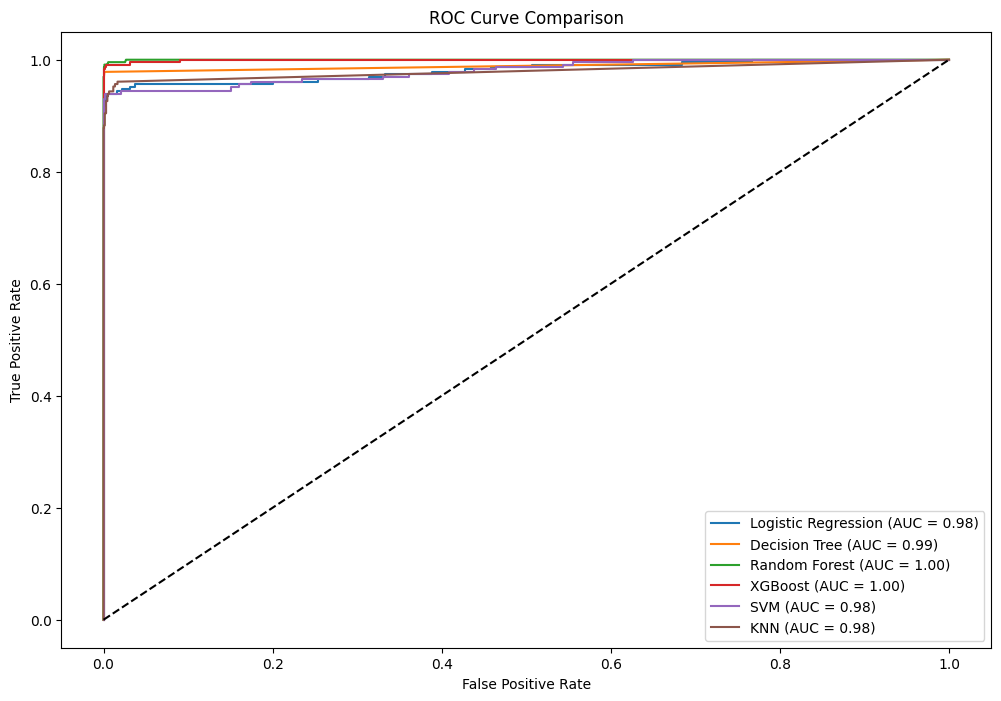

In [18]:

# Plot ROC Curve for each model
plt.figure(figsize=(12, 8))
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):  # Check if model has predict_proba
        y_prob = model.predict_proba(x_test_scaled)[:, 1]
    elif hasattr(model, 'decision_function'):  # For SVM without probability=True
        y_prob = model.decision_function(x_test_scaled)
    else:
        continue
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()
